# Iteration 1, train a Decision Tree


**Dataset variables:**

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

- Impute the missing values with the mean or the median of their column.
- Train a Decision Tree to predict the prices of the houses.
- Prune the Decision Tree and improve its performance as much as you can.

## 1.Read the Data

In [1]:
import pandas as pd

In [2]:
url = "https://drive.google.com/file/d/1X0ysrPjRZrdI_Tpz919KcjriQ_NOFRTm/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)

In [3]:
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [4]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

## 2.Define X and y

In [5]:
X=data
y=X.pop("Expensive")

In [6]:
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

## 3.Basic Exploration

Just look briefly at the data types of your columns and get an idea of how they look like.

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [9]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

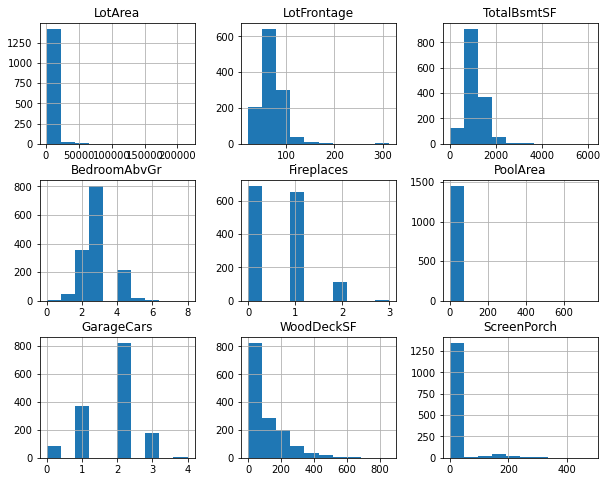

In [10]:
X.hist(figsize=(10,8));

## 4.Data Splitting (Train - Test)

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test.

- train: data used to build the model. Usually between 70% and 85% of the data.
- test: data that the model has not “seen”, used to check whether the model would be good in a real scenario. The remaining 15% to 30%.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [12]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
252,8366,65.0,798,3,0,0,2,138,0
679,9945,NaN,988,3,0,0,2,0,0
1449,1533,21.0,630,1,0,0,0,0,0
322,10380,86.0,1502,4,1,0,2,201,0


In [13]:
y_train

772     0
157     1
360     0
744     0
150     0
       ..
252     0
679     0
1449    0
322     1
1391    0
Name: Expensive, Length: 1168, dtype: int64

In [14]:
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,17542,NaN,1192,3,2,0,2,220,0
202,7000,50.0,617,2,0,0,1,0,0
213,13568,43.0,990,3,0,0,2,224,0
1331,10780,55.0,911,3,0,0,2,0,0
120,21453,NaN,938,1,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...
978,9450,68.0,894,3,0,0,2,0,0
1057,29959,NaN,973,3,1,0,2,168,0
782,16285,67.0,1413,3,0,0,2,0,0
125,6780,60.0,520,2,0,0,0,53,0


In [15]:
y_test

1253    1
202     0
213     0
1331    0
120     0
       ..
978     0
1057    0
782     0
125     0
1409    0
Name: Expensive, Length: 292, dtype: int64

## 5.Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

Import it from the appropriate submodule of Scikit-Learn.
Initialize it.
Fit it.

In [16]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier
# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()
# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

ValueError: ignored

We got an error: the model cannot deal with categorical features. We will soon encode them as numbers, but our approach should always be to quickly complete the task first, and iterate to improve it later. This is the reason why we will simply start by dropping the categorical features.



## 6.Select only numerical features

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [18]:
X_num =X.select_dtypes(include="number")

## 7.Dealing with missing data

We will use the SimpleImputer() with its default values. It will replace any missing value with the mean of the column it belongs to.

In [19]:
# import
from sklearn.impute import SimpleImputer
# initialize
my_imputer = SimpleImputer()

# fit
my_imputer.fit(X_train)

# transform train 
X_train = my_imputer.transform(X_train)

### 7.1. Implement a Decision Tree

( missing values imputed)

In [20]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_train, 
            y = y_train)

DecisionTreeClassifier()

### 7.2. Make predictions and check accuracy on the train set

In [21]:
# make predictions
y_pred_tree_train = my_tree.predict(X_train)

In [22]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

## 8.Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

### 8.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [23]:
X_imputed_test = my_imputer.transform(X_test)

### 8.2. Make predictions on the test set

In [24]:
y_pred_tree_test = my_tree.predict(X_imputed_test)

### 8.3. Check accuracy score on the test set

In [26]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8698630136986302

This accuracy is even lower than some of our intuition-based models...

Our model has a very high variance: the difference between train and test set is huge.

We can also say that our model suffers from overfitting: it has captured patterns in the training set that were not present in the testing set.

We will need to improve the model.

## 9.Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram

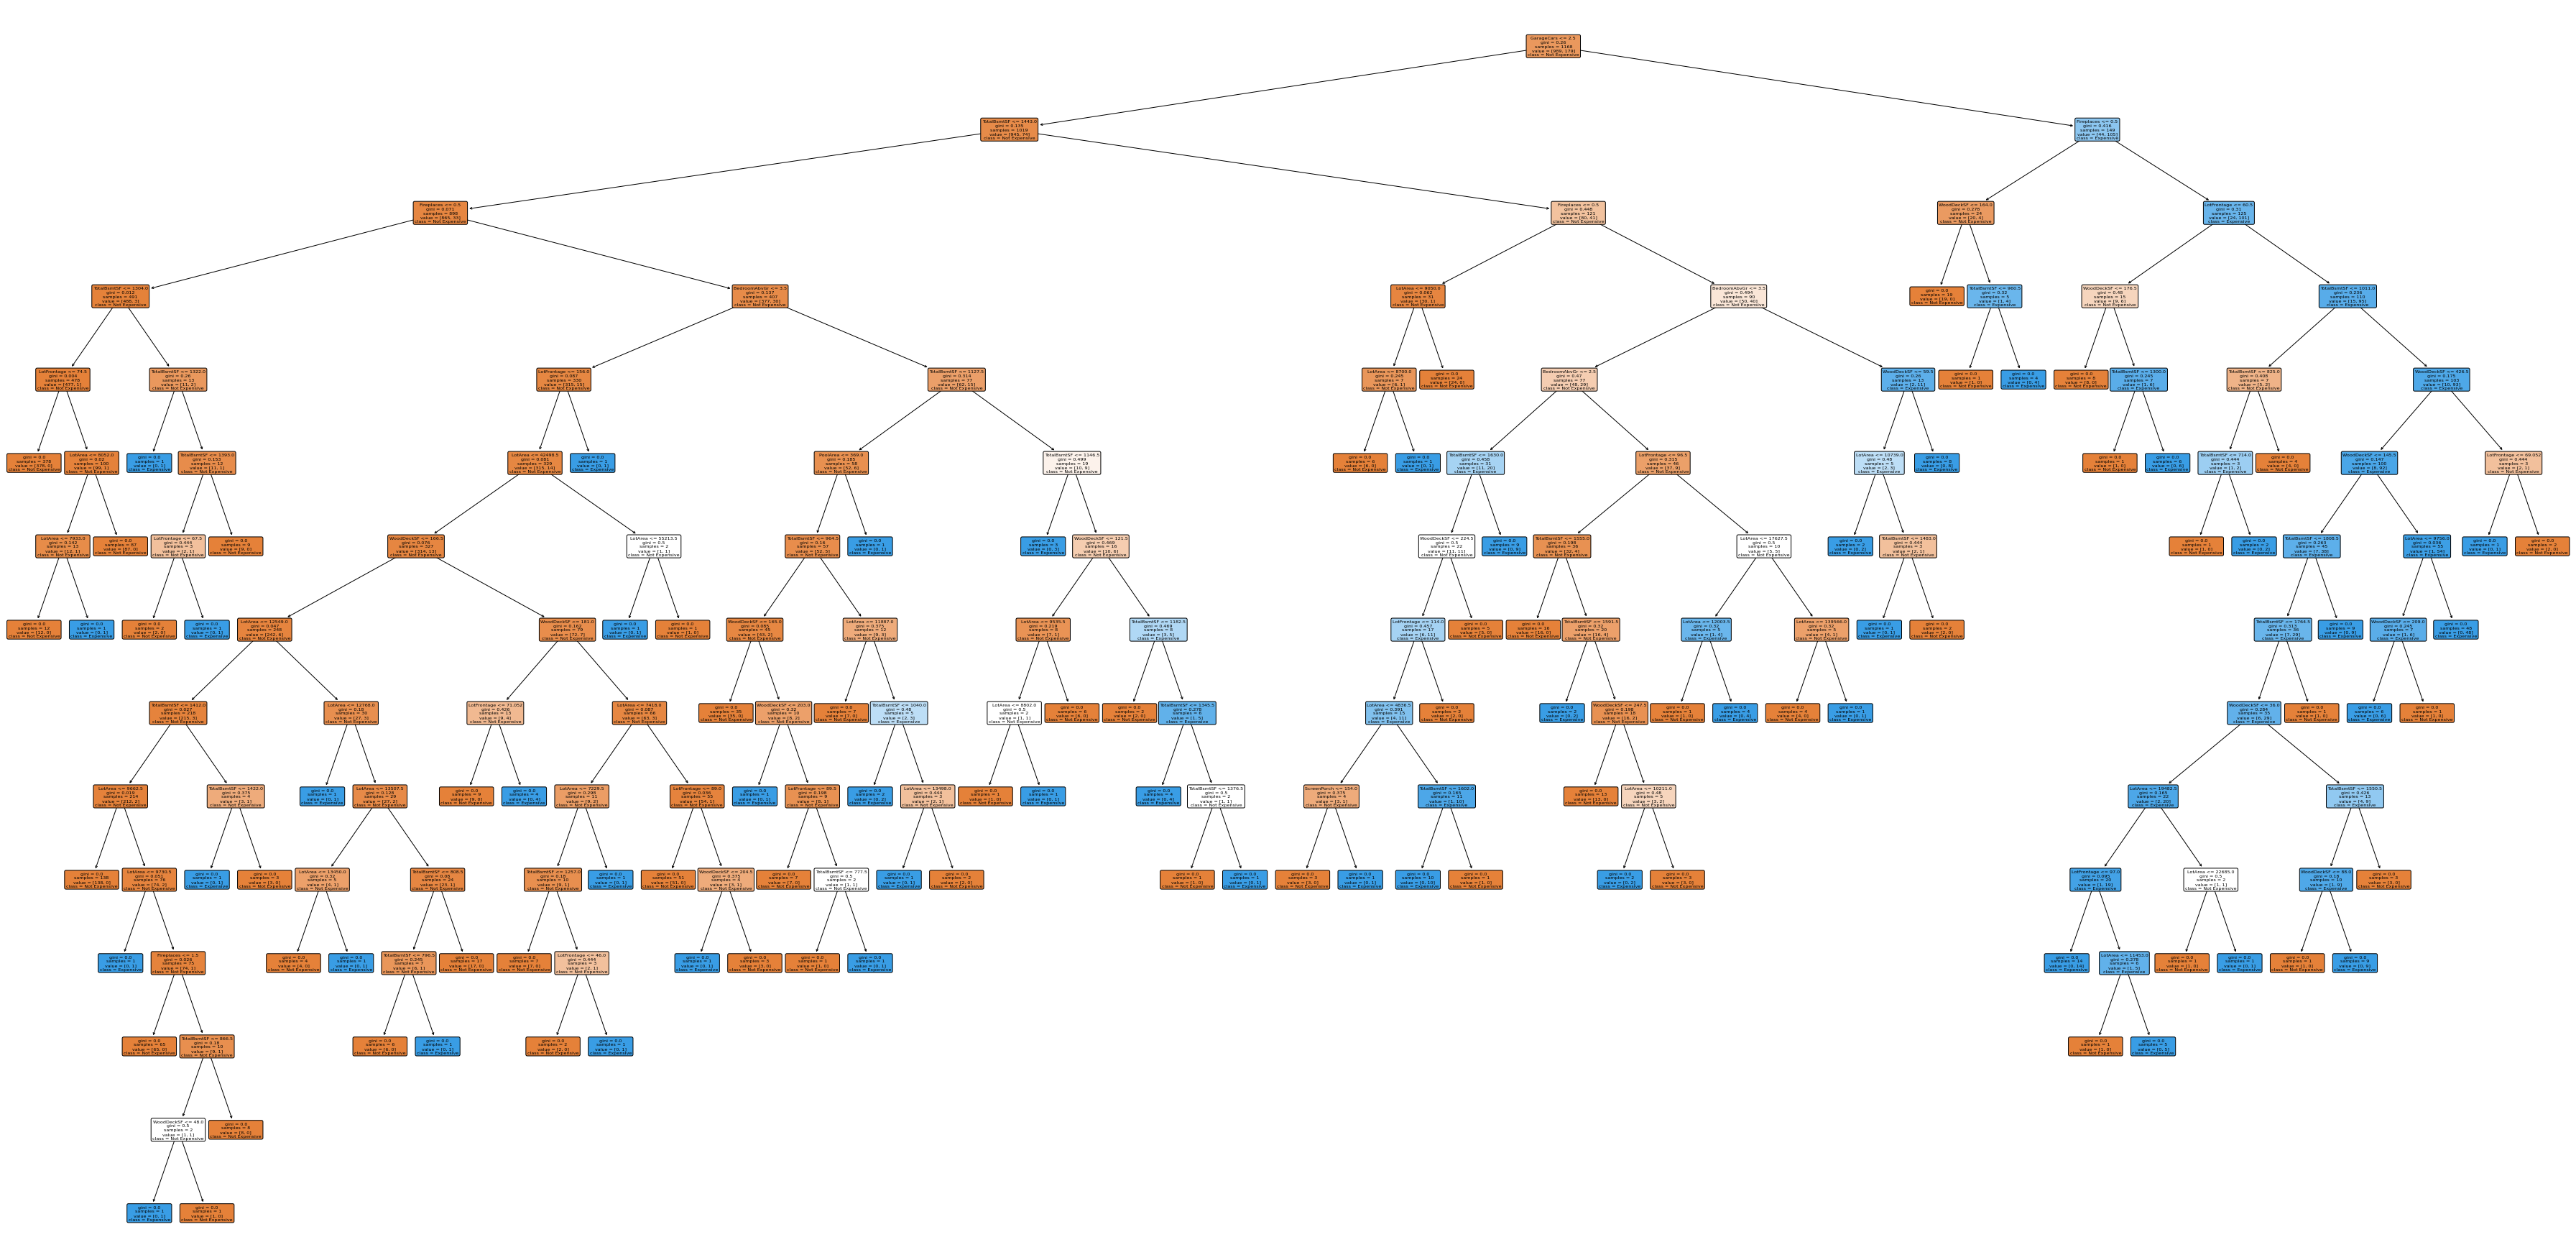

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is very complex, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

## 10.Prune the Decision Tree 

Pruning the tree
Tweak the parameters max_depth and min_samples_leaf of the decision tree, based on the Scikit-Learn documentation and the Statquest videos you watched following the Learning Platform.
Try to make the tree smaller.
Visualize again the tree.
Check the performance of your "small tree" on the train & test sets.

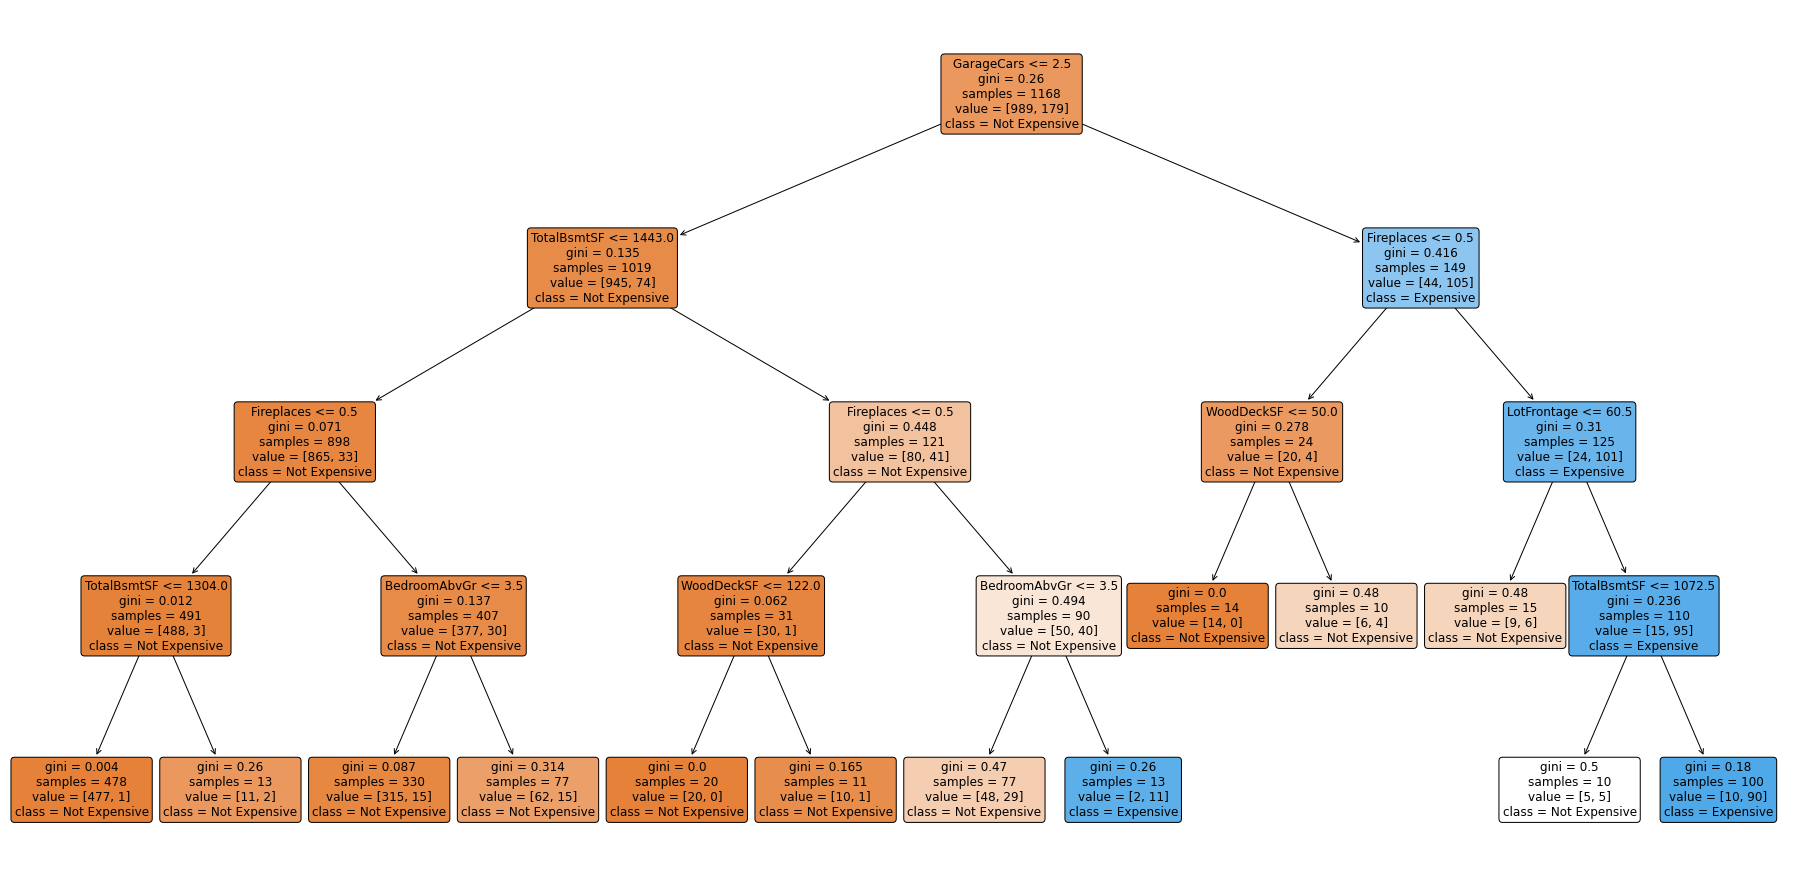

In [28]:
# Solution:
# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=4,
                                 min_samples_leaf=10
                                )

# 3. fit the model to the train data
my_tree.fit(X = X_train, 
            y = y_train)

plt.figure(figsize=(32, 16))
plot_tree(
    my_tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Expensive','Expensive'], 
    feature_names=X_num.columns
    );